In [3]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from numpy import fft
from scipy import fftpack

cutoff = 1000
sample = 44102
taps   = 15

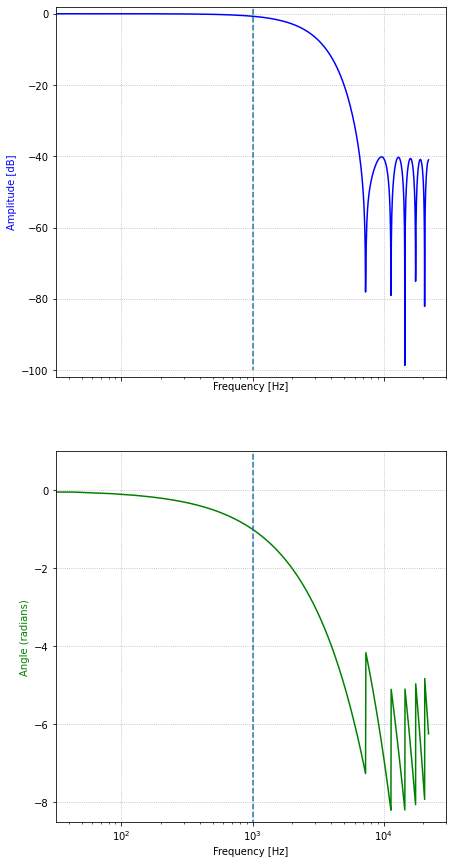

In [29]:
b    = signal.firwin(numtaps=taps, cutoff=cutoff, fs=sample, pass_zero='lowpass')
w, h = signal.freqz(b)

fig, (ax1, ax2) = plt.subplots(nrows = 2,sharex=True, figsize=(7,15))
#fig.suptitle('Digital filter frequency response', fontsize=15)

ax1.plot(w/np.pi*sample/2, 20 * np.log10(abs(h)), color='b', label='Amplitude')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [Hz]')
ax1.grid(linestyle='dotted')
ax1.set_xscale('log')
ax1.vlines(cutoff, min(20 * np.log10(abs(h)))+100, max(20 * np.log10(abs(h)))-100, linestyle='dashed')
ax1.set_ylim(bottom=-102, top=2)


angles = np.unwrap(np.angle(h))
ax2.plot(w/np.pi*sample/2, angles, color='g', label='Phase')
ax2.set_xlabel('Frequency [Hz]')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid(linestyle='dotted')
ax2.vlines(cutoff, -200, 50, linestyle='dashed')
ax2.set_ylim(bottom=-8.5, top=1)
#ax2.axis('tight')
plt.show()

fig.savefig('figures/low_pass_15_taps.pdf')


In [30]:
b

array([0.00906975, 0.01491539, 0.03127   , 0.05576935, 0.08385311,
       0.10978818, 0.12803422, 0.13459999, 0.12803422, 0.10978818,
       0.08385311, 0.05576935, 0.03127   , 0.01491539, 0.00906975])

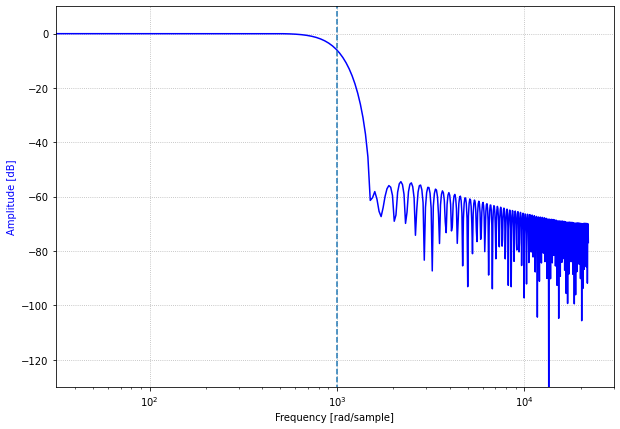

In [31]:
b    = signal.firwin(numtaps=150, cutoff=cutoff, fs=sample, pass_zero='lowpass')
w, h = signal.freqz(b)

fig, ax1 = plt.subplots(figsize=(10,7))
#ax1.set_title('Digital filter frequency response')
ax1.plot(w/np.pi*sample/2, 20 * np.log10(abs(h)), color='b', label='Amplitude')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax1.set_xscale('log')
ax1.vlines(cutoff, -200, 50, linestyle='dashed')
ax1.set_ylim(bottom=-130, top=10)
ax1.grid(linestyle='dotted')

'''ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w/np.pi*sample/2, angles, color='g', label='Phase')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()
'''

fig.savefig('figures/low_pass_150_taps.pdf')

"\nax2 = ax1.twinx()\nangles = np.unwrap(np.angle(h))\nax2.plot(w/np.pi*sample/2, angles, color='g', label='Phase')\nax2.set_ylabel('Angle (radians)', color='g')\nax2.grid()\nax2.axis('tight')\nplt.show()"

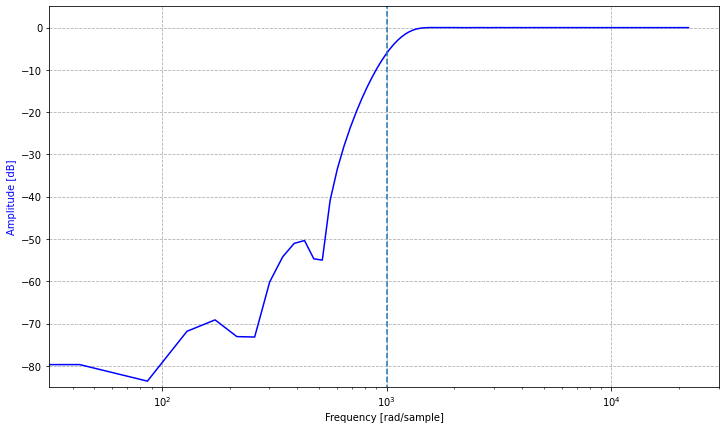

In [35]:
b    = signal.firwin(numtaps=151, cutoff=cutoff, fs=sample, pass_zero='highpass')
w, h = signal.freqz(b)

fig, ax1 = plt.subplots(figsize=(12,7))
#ax1.set_title('Digital filter frequency response')
ax1.plot(w/np.pi*sample/2, 20 * np.log10(abs(h)), color='b', label='Amplitude')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax1.set_xscale('log')
ax1.grid(linestyle='dashed')
ax1.vlines(cutoff, -200, 50, linestyle='dashed')
ax1.set_ylim(bottom=-85, top=5)
'''
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w/np.pi*sample/2, angles, color='g', label='Phase')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()'''

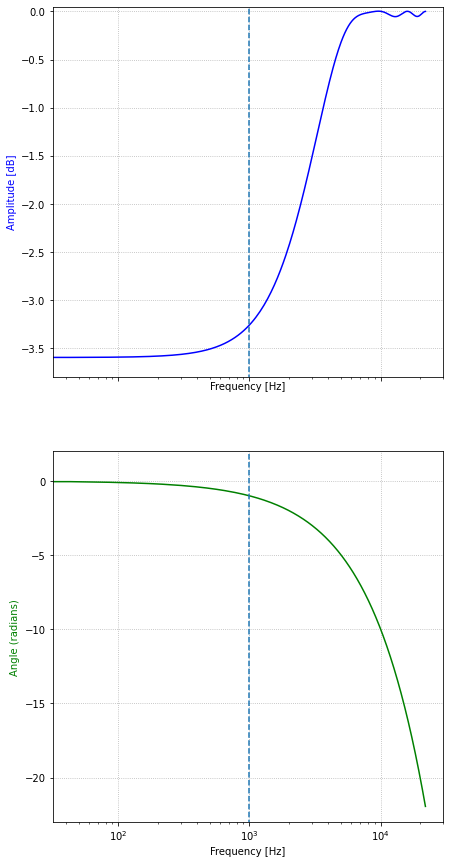

In [39]:
b    = signal.firwin(numtaps=taps, cutoff=cutoff, fs=sample, pass_zero='highpass')
w, h = signal.freqz(b)

fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize=(7,15), sharex=True)
#fig.suptitle('Digital filter frequency response', fontsize=15)

ax1.plot(w/np.pi*sample/2, 20 * np.log10(abs(h)), color='b', label='Amplitude')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [Hz]')
ax1.grid(linestyle='dotted')
ax1.set_xscale('log')
ax1.vlines(cutoff, -200, 50, linestyle='dashed')
ax1.set_ylim(bottom=-3.8, top=.05)


angles = np.unwrap(np.angle(h))
ax2.plot(w/np.pi*sample/2, angles, color='g', label='Phase')
ax2.set_xlabel('Frequency [Hz]')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid(linestyle='dotted')
ax2.vlines(cutoff, -200, 50, linestyle='dashed')
ax2.set_ylim(bottom=-23, top=2)
#ax2.axis('tight')
plt.show()


fig.savefig('figures/high_pass_15_taps.pdf')


In [95]:
b*128


array([ -0.38996938,  -0.64131245,  -1.34450697,  -2.3978981 ,
        -3.60540669,  -4.72052905,  -5.50504887, 121.82961538,
        -5.50504887,  -4.72052905,  -3.60540669,  -2.3978981 ,
        -1.34450697,  -0.64131245,  -0.38996938])

In [5]:
!ls /dev

acpi_thermal_rel  loop13  loop51	ppp	  tty2	 tty58	    ttyS9
autofs		  loop14  loop52	psaux	  tty20  tty59	    ttyUSB1
block		  loop15  loop53	ptmx	  tty21  tty6	    udmabuf
bsg		  loop16  loop54	pts	  tty22  tty60	    uhid
btrfs-control	  loop17  loop55	random	  tty23  tty61	    uinput
bus		  loop18  loop56	rfkill	  tty24  tty62	    urandom
char		  loop19  loop57	rtc	  tty25  tty63	    userio
console		  loop2   loop58	rtc0	  tty26  tty7	    v4l
core		  loop20  loop59	sda	  tty27  tty8	    vboxdrv
cpu		  loop21  loop6		sda1	  tty28  tty9	    vboxdrvu
cpu_dma_latency   loop22  loop60	sdb	  tty29  ttyprintk  vboxnetctl
cuse		  loop23  loop61	sdb1	  tty3	 ttyS0	    vboxusb
disk		  loop24  loop62	sdb2	  tty30  ttyS1	    vcs
dma_heap	  loop25  loop63	sdb3	  tty31  ttyS10     vcs1
dri		  loop26  loop64	sdb4	  tty32  ttyS11     vcs2
drm_dp_aux0	  loop27  loop65	sdb5	  tty33  ttyS12     vcs3
ecryptfs	  loop28  loop66	sdb6	  tty34  ttyS13     vcs4
fb0		  loop29  loop67	sdb7	  tty35  ttyS14     

In [6]:
import serial
ser = serial.Serial('/dev/ttyUSB1', baudrate=115200) #porta destra pd aidin


In [137]:
with serial.Serial('/dev/ttyUSB1', baudrate=115200) as ser:
    d = ser.read(2000000)

KeyboardInterrupt: 

In [84]:
out_l = np.array(list(d[0:len(d):2]))
out_r = np.array(list(d[1:len(d):2]))
for i in range(len(out_l)):
    if out_l[i] > 127:
        out_l[i] = out_l[i] - 256

for i in range(len(out_r)):
    if out_r[i] > 127:
        out_r[i] = out_r[i] - 256

In [85]:
2**16


65536

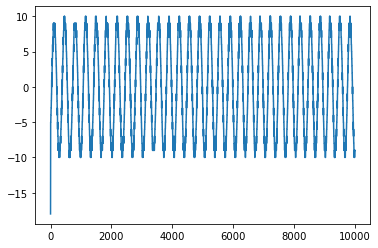

In [86]:
plt.plot(out_r[:10000]-out_l[:10000])

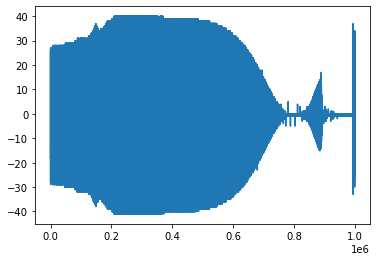

In [94]:
plt.plot(out_r)

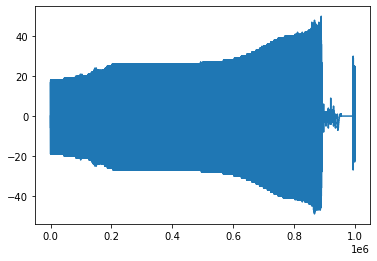

In [95]:
plt.plot(out_l)


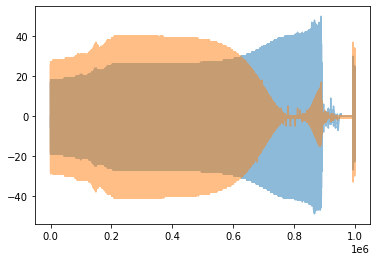

In [97]:
plt.plot(out_l, alpha=0.5)
plt.plot(out_r, alpha=0.5)


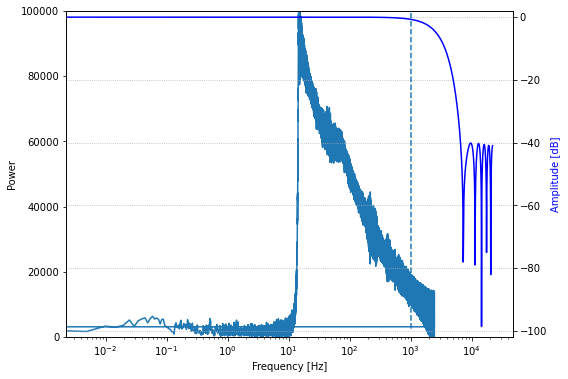

In [107]:
# The FFT of the signal
sig_fft = fftpack.fft(out_r)

# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft) # these are the "weights" of the Fourier components for each discrete frequency interval

time_step = 1/4900
# The return the corresponding frequencies
sample_freq = fftpack.fftfreq(out_r.size, d=time_step)

# Plot the FFT power
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(sample_freq, power)
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Power')
#ax.set_xlim(left=0)
ax.set_xscale('log')

ax.set_ylim(bottom=0, top=100000)

ax2 = ax.twinx()
b    = signal.firwin(numtaps=taps, cutoff=cutoff, fs=sample, pass_zero='lowpass')
w, h = signal.freqz(b)

ax2.plot(w/np.pi*sample/2, 20 * np.log10(abs(h)), color='b', label='Amplitude')
ax2.set_ylabel('Amplitude [dB]', color='b')
ax2.set_xlabel('Frequency [Hz]')
ax2.grid(linestyle='dotted')
ax2.set_xscale('log')
ax2.vlines(cutoff, min(20 * np.log10(abs(h)))+100, max(20 * np.log10(abs(h)))-100, linestyle='dashed')
ax2.set_ylim(bottom=-102, top=2)

plt.show()

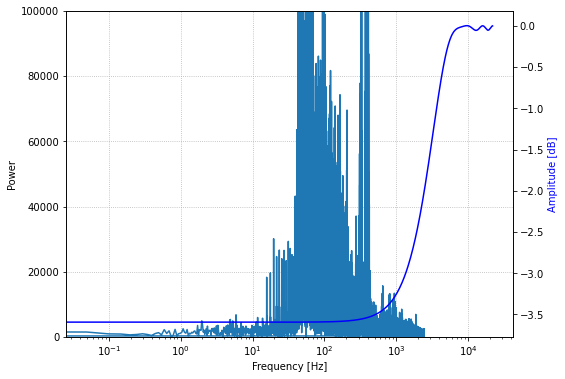

In [116]:
# The FFT of the signal
sig_fft = fftpack.fft(out_l)

# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft) # these are the "weights" of the Fourier components for each discrete frequency interval

time_step = 1/4900
# The return the corresponding frequencies
sample_freq = fftpack.fftfreq(out_l.size, d=time_step)

# Plot the FFT power
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(sample_freq, power)
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Power')
#ax.set_xlim(left=0)
ax.set_ylim(bottom=0, top=100000)

ax2 = ax.twinx()
b    = signal.firwin(numtaps=taps, cutoff=cutoff, fs=sample, pass_zero='highpass')
w, h = signal.freqz(b)

ax2.plot(w/np.pi*sample/2, 20 * np.log10(abs(h)), color='b', label='Amplitude')
ax2.set_ylabel('Amplitude [dB]', color='b')
ax2.set_xlabel('Frequency [Hz]')
ax.grid(linestyle='dotted')
ax2.set_xscale('log')
#ax2.vlines(cutoff, min(20 * np.log10(abs(h)))+100, max(20 * np.log10(abs(h)))-100, linestyle='dashed')
#ax2.set_ylim(bottom=-102, top=2)

plt.show()

In [147]:
with serial.Serial('/dev/ttyUSB1', baudrate=1026364) as ser: #537619 115200
    d = ser.read(16000000)

out_l = np.array(list(d[0:len(d):2]))
out_r = np.array(list(d[1:len(d):2]))
for i in range(len(out_l)):
    if out_l[i] > 127:
        out_l[i] = out_l[i] - 256

for i in range(len(out_r)):
    if out_r[i] > 127:
        out_r[i] = out_r[i] - 256

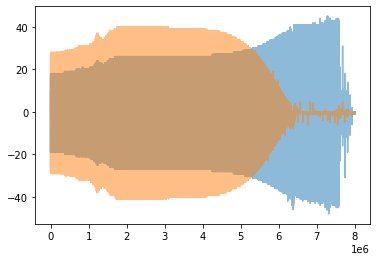

In [148]:
plt.plot(out_l[0:], alpha=.5)
plt.plot(out_r[0:], alpha=.5)


(10, 47155.38432881136)

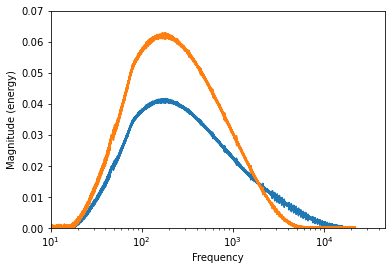

In [159]:

plt.magnitude_spectrum(out_l, Fs=44102, alpha=1)
plt.magnitude_spectrum(out_r, Fs=44102, alpha=1)

plt.ylim(bottom=0, top=.07)
plt.xscale('log')
plt.xlim(left=10)